# Stock Prediction using CNN

**Prerequisite**
```!pip install pandas_datareader --user```

In [1]:
import os, sys
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

In [2]:
stock_list = ['KBANK','SCB','BBL','KTB']
stock_data = []
stock_name = []
for quote in tqdm(stock_list):
    try:
        stock_data.append(pdr.get_data_yahoo('{}.BK'.format(quote), start='2010-01-01', end='2019-04-15'))
        stock_name.append(quote)
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])

100%|██████████| 4/4 [00:00<00:00, 801.59it/s]

Error: <class 'pandas_datareader.exceptions.ImmediateDeprecationError'>
Description: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues

Error: <class 'pandas_datareader.exceptions.ImmediateDeprecationError'>
Description: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues

Error: <class 'pandas_datareader.exceptions.ImmediateDeprecationError'>
Description: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues

Erro

In [2]:
stock_data[0].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,85.50,84.00,85.25,84.50,2410100.0,69.404213
2010-01-05,85.25,84.25,85.00,84.50,4058600.0,69.404213
2010-01-06,86.00,84.75,85.00,85.75,9900800.0,70.430893
2010-01-07,87.75,86.25,86.50,86.75,13073500.0,71.252266
2010-01-08,88.25,86.75,87.50,88.00,10187600.0,72.278961


In [ ]:
from matplotlib import pyplot
import pandas as pd
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

### Function สำหรับ Preprocess ข้อมูล Time Series หลายตัวแปร

In [3]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,feat_name=None):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{feat_name[j]}(t-{i})' for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{feat_name[j]}(t)' for j in range(n_vars)]
        else:
            names += [f'{feat_name[j]}(t+{i})' for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# เลือกข้อมูลหุ้นจาก list ของ DataFrame และ drop column 'Close' เนื่องจากเราจะใช้ column 'Adj. Close' เท่านั้น
stock_data[0] = stock_data[0].drop('Close',axis=1)
dataset = stock_data[0]
values = dataset.values
values = values.astype('float32')

# ทำ scaling ข้อมูลด้วยวิธี min max scaling เปลี่ยน scale ข้อมูลแต่ละ column ให้อยู่ระหว่าง [0,1] และเก็บค่า min max แต่ละ column ไว้สำหรับทำ rescale ข้อมูลภายหลัง
min_dict = dict()
max_dict = dict()
for col in dataset.columns:
  min_dict[col] = dataset[col].min()
  max_dict[col] = dataset[col].max()
  dataset[col] = (dataset[col] - dataset[col].min())/(dataset[col].max()-dataset[col].min())
  
# ใช้ function สำหรับ preprocess ข้อมูลที่เขียนไว้ และ drop column ที่ไม่ได้ใช้
reframed = series_to_supervised(dataset.values, 30, 3,feat_name=stock_data[0].columns)
reframed.drop(['High(t)','High(t+1)','High(t+2)','Low(t)','Low(t+1)','Low(t+2)','Open(t)','Open(t+1)','Open(t+2)','Volume(t)','Volume(t+1)',\
               'Volume(t+2)'],axis=1,inplace=True)

In [4]:
reframed.head()

,High(t-30),Low(t-30),Open(t-30),Volume(t-30),Adj Close(t-30),High(t-29),Low(t-29),Open(t-29),Volume(t-29),Adj Close(t-29),High(t-28),Low(t-28),Open(t-28),Volume(t-28),Adj Close(t-28),High(t-27),Low(t-27),Open(t-27),Volume(t-27),Adj Close(t-27),High(t-26),Low(t-26),Open(t-26),Volume(t-26),Adj Close(t-26),High(t-25),Low(t-25),Open(t-25),Volume(t-25),Adj Close(t-25),High(t-24),Low(t-24),Open(t-24),Volume(t-24),Adj Close(t-24),High(t-23),Low(t-23),Open(t-23),Volume(t-23),Adj Close(t-23),High(t-22),Low(t-22),Open(t-22),Volume(t-22),Adj Close(t-22),High(t-21),Low(t-21),Open(t-21),Volume(t-21),Adj Close(t-21),High(t-20),Low(t-20),Open(t-20),Volume(t-20),Adj Close(t-20),High(t-19),Low(t-19),Open(t-19),Volume(t-19),Adj Close(t-19),High(t-18),Low(t-18),Open(t-18),Volume(t-18),Adj Close(t-18),High(t-17),Low(t-17),Open(t-17),Volume(t-17),Adj Close(t-17),High(t-16),Low(t-16),Open(t-16),Volume(t-16),Adj Close(t-16),High(t-15),Low(t-15),Open(t-15),Volume(t-15),Adj Close(t-15),High(t-14),Low(t-14),Open(t-14),Volume(t-14),Adj Close(t-14),High(t-13),Low(t-13),Open(t-13),Volume(t-13),Adj Close(t-13),High(t-12),Low(t-12),Open(t-12),Volume(t-12),Adj Close(t-12),High(t-11),Low(t-11),Open(t-11),Volume(t-11),Adj Close(t-11),High(t-10),Low(t-10),Open(t-10),Volume(t-10),Adj Close(t-10),High(t-9),Low(t-9),Open(t-9),Volume(t-9),Adj Close(t-9),High(t-8),Low(t-8),Open(t-8),Volume(t-8),Adj Close(t-8),High(t-7),Low(t-7),Open(t-7),Volume(t-7),Adj Close(t-7),High(t-6),Low(t-6),Open(t-6),Volume(t-6),Adj Close(t-6),High(t-5),Low(t-5),Open(t-5),Volume(t-5),Adj Close(t-5),High(t-4),Low(t-4),Open(t-4),Volume(t-4),Adj Close(t-4),High(t-3),Low(t-3),Open(t-3),Volume(t-3),Adj Close(t-3),High(t-2),Low(t-2),Open(t-2),Volume(t-2),Adj Close(t-2),High(t-1),Low(t-1),Open(t-1),Volume(t-1),Adj Close(t-1),Adj Close(t),Adj Close(t+1),Adj Close(t+2)
30,0.036179,0.039301,0.043290,0.055656,0.032814,0.034732,0.040757,0.041847,0.093725,0.032814,0.039074,0.043668,0.041847,0.228637,0.038891,0.049204,0.052402,0.050505,0.301904,0.043752,0.052098,0.055313,0.056277,0.235260,0.049829,0.053546,0.058224,0.062049,0.122073,0.047398,0.056440,0.058224,0.054834,0.245366,0.049829,0.050651,0.058224,0.056277,0.124724,0.049829,0.053546,0.061135,0.062049,0.120886,0.048614,0.052098,0.052402,0.059163,0.141857,0.042537,0.040521,0.048035,0.047619,0.106241,0.040106,0.041968,0.043668,0.047619,0.125207,0.034029,0.033285,0.029112,0.040404,0.173910,0.030384,0.026049,0.027656,0.033189,0.219851,0.023091,0.018813,0.021834,0.021645,0.151415,0.021876,0.030391,0.023290,0.021645,0.145857,0.029168,0.028944,0.027656,0.036075,0.157814,0.020661,0.018813,0.021834,0.027417,0.095780,0.017015,0.021708,0.020378,0.024531,0.084836,0.018230,0.018813,0.020378,0.018759,0.109580,0.023091,0.021708,0.024745,0.028860,0.066196,0.023091,0.024602,0.026201,0.033189,0.081841,0.019445,0.027496,0.027656,0.025974,0.066911,0.030384,0.024602,0.029112,0.031746,0.070978,0.021876,0.010130,0.011645,0.018759,0.175358,0.008507,0.001447,0.000000,0.010101,0.160648,0.003646,0.001447,0.000000,0.001443,0.105497,0.008507,0.007236,0.013100,0.011544,0.093664,0.009723,0.004342,0.007278,0.010101,0.140051,0.009723,0.004342,0.011645,0.011544,0.113982,0.009723,0.000000,0.006077,0.010938
31,0.034732,0.040757,0.041847,0.093725,0.032814,0.039074,0.043668,0.041847,0.228637,0.038891,0.049204,0.052402,0.050505,0.301904,0.043752,0.052098,0.055313,0.056277,0.235260,0.049829,0.053546,0.058224,0.062049,0.122073,0.047398,0.056440,0.058224,0.054834,0.245366,0.049829,0.050651,0.058224,0.056277,0.124724,0.049829,0.053546,0.061135,0.062049,0.120886,0.048614,0.052098,0.052402,0.059163,0.141857,0.042537,0.040521,0.048035,0.047619,0.106241,0.040106,0.041968,0.043668,0.047619,0.125207,0.034029,0.033285,0.029112,0.040404,0.173910,0.030384,0.026049,0.027656,0.033189,0.219851,0.023091,0.018813,0.021834,0.021645,0.151415,0.021876,0.030391,0.023290,0.021645,0.145857,0.029168,0.028944,0.027656,0.036075,0.157814,0.020661,0.018813,0.021834,0.027417,0.095780,0.017015,0.021708,0.020378,0.024

In [0]:
# split into train and test sets
values = reframed.values
n_train_percent = 0.9
split = int(values.shape[0]*0.9)
train = values[:split, :]
test = values[split:, :]

In [0]:
date_reframed = dataset.index[reframed.index]
date_train = date_reframed[:split]
date_test = date_reframed[split:]

In [0]:
# split into input and outputs
train_X, train_y = train[:, :-3], train[:, -3:]
test_X, test_y = test[:, :-3], test[:, -3:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [8]:
train_X

array([[[0.03617945, 0.03930131, 0.04329004, ..., 0.01154401,
         0.11398155, 0.00972262]],

       [[0.03473227, 0.04075691, 0.04184704, ..., 0.01010101,
         0.08878035, 0.        ]],

       [[0.03907381, 0.04366812, 0.04184704, ..., 0.        ,
         0.07224589, 0.00607674]],

       ...,

       [[0.82633864, 0.82532751, 0.82106782, ..., 0.65079365,
         0.08531643, 0.73507009]],

       [[0.83791606, 0.83114993, 0.82683983, ..., 0.65945166,
         0.08957013, 0.75246126]],

       [[0.82054993, 0.7845706 , 0.82106782, ..., 0.67965368,
         0.11830222, 0.75246126]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2012 samples, validate on 224 samples
Epoch 1/100
 - 1s - loss: 0.0721 - val_loss: 0.0433
Epoch 2/100
 - 0s - loss: 0.0832 - val_loss: 0.0496
Epoch 3/100
 - 0s - loss: 0.0518 - val_loss: 0.0561
Epoch 4/100
 - 0s - loss: 0.0625 - val_loss: 0.0624
Epoch 5/100
 - 0s - loss: 0.0744 - val_loss: 0.0429
Epoch 6/100
 - 0s - loss: 0.0767 - val_loss: 0.0351
Epoch 7/100
 - 0s - loss: 0.0541 - val_loss: 0.0500
Epoch 8/100
 - 0s - loss: 0.0618 - val_loss: 0.0340
Epoch 9/100
 - 0s - loss: 0.0433 - val_loss: 0.0330
Epoch 10/100
 - 0s - loss: 0.0537 - val_loss: 0.0381
Epoch 11/100
 - 0s - loss: 0.0436 - val_loss: 0.0370
Epoch 12/100
 - 0s - loss: 0.0595 - val_loss: 0.0353
Epoch 13/100
 - 0s - loss: 0.0403 - val_loss: 0.0323
Epoch 14/100
 - 0s - loss: 0.0533 - val_loss: 0.0402
Epoch 15/100
 - 0s - loss: 0.0395 - val_loss: 0.0321
Epoch 16/100
 - 0s - loss: 0.0566 - val_loss: 0

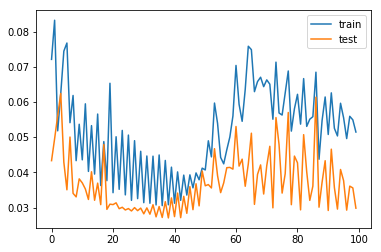

In [10]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [0]:
inv_yhat = yhat*(max_dict['Adj Close']-min_dict['Adj Close'])+min_dict['Adj Close']
inv_y = test_y*(max_dict['Adj Close']-min_dict['Adj Close'])+min_dict['Adj Close']

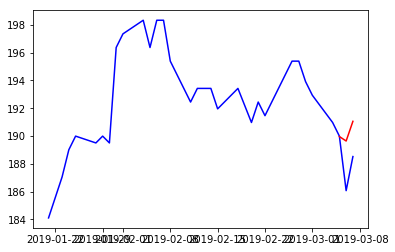

In [32]:
import numpy as np
# also show the price of previous 30 days + datetime
idx = np.random.randint(0,len(yhat-3))
if idx <30:
  date_actual = date_test[:idx+3]
else:
  date_actual = date_test[idx-30:idx+3]

_=pyplot.plot(date_actual,inv_y[max(0,idx-30):idx+3,0],'b')
_=pyplot.plot(date_test[idx:idx+3],inv_yhat[idx],'r')